# AI4GSD Demo
------------------------------------------
## Smartphone photos and videos
------------------------------------------
#### Table of contents
#### 0. Installing requried packages (please restart the kernel after installation)
#### 1. Importing required packages
#### 2. Defining working directory
#### 3. Extracting or copying your videos/photos to desired folder
#### 4. Obtaining scales from AI, drone flight data, or manual measurements
#### 5. Obtaining segmentation of anthropogenic objects
#### 6. Obtaining grain size data
#### 7. Applying quality control

##### *** Please contact Yunxiang Chen, yunxiang.chen@pnnl.gov for reporting errors

------------------------------------------
### 0. Installing requried packages (please restart the kernel after installation)

In [1]:
#!pip install --user natsort
#!pip install --user ismember

### 1. Importing required packages

In [2]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))
import AI4GSD

### 2. Defining working directory

In [3]:
WorkDir = os.path.dirname(os.getcwd())
foldername = '20250627_LR_WalkSmartphoneFieldTest'                         # Parent folder where you save photos/videos.
PhotoDir = WorkDir + os.sep + 'Demo_Data' + os.sep + foldername               

### 3. Extracting or copying your videos/photos to desired folder

In [4]:
AI4GSD.getPhotos(PhotoDir,nframe=150, overwrite=False)                     # Use once.

Corrected orientation for: IMG_7900.JPG
Corrected orientation for: IMG_7908.JPG
Corrected orientation for: IMG_7914.JPG
Corrected orientation for: IMG_7919.JPG
Cuts photos output folder: /home/chen200/Computation/Python/work/Mine/SFA/AI4GSD/Demo_Data/20250627_LR_WalkSmartphoneFieldTest/
Video photo output folder: /home/chen200/Computation/Python/work/Mine/SFA/AI4GSD/Demo_Data/20250627_LR_WalkSmartphoneFieldTest
Cutting IMG_7918.MOV: to size 1280(w) * 1280(h) every 150 frames.
IMG_7918.MOV: get frame 1 from 150/444 in 0.39 s (33.78%)
IMG_7918.MOV: get frame 2 from 300/444 in 0.26 s (67.57%)

Computation done, elapsed time 0.75 seconds.




### 4. Obtaining scales from AI, drone flight data, or manual measurements

In [5]:
PP = AI4GSD.parameters()
PP.Directory = PhotoDir
PP.OverWriteAll = True                                                     # Overwrite everything if True.
PP.Directory = PhotoDir
PP.OverWriteScaleFile = False
PP.OverWriteScaleRows = True
PP.ScaleSource = 'AI'                                                      # Use AI option.
PP.ModelName = 'YOLO11m.1280.20250825'                                     # Which AI to use.
PP.ComputingSource = 'local'                                               # What computing resource to use.
PP.ImageSizeFactor = 1                                                     # Do you need to user a larger image size for inference?
PP.ConfidenceThreshold = 0.85                                              # Minimum confidence threshold.
PP.YOLOSave = False                                                        # Need to save AI prediction to folder.
scales =  AI4GSD.metadata(PP)

Generating scale file for: 20250627_LR_WalkSmartphoneFieldTest
Estimating photo resolution via local AI model: YOLO11m.1280.20250825
Model layer: 113, model parmeter: 20.06M, submodule number: 409
1/6: photo 1/6, IMG_7900.JPG, scale redbluecap, res 0.16 mm/px, status 200, (16.67%), 1.69 s
2/6: photo 2/6, IMG_7908.JPG, scale redbluecap, res 0.15 mm/px, status 200, (33.33%), 0.66 s
3/6: photo 3/6, IMG_7914.JPG, scale redbluecap, res 0.16 mm/px, status 200, (50.00%), 0.61 s
4/6: photo 4/6, IMG_7918_150.png, scale N/A, res 1 px/px, status 200, (66.67%), 0.71 s
5/6: photo 5/6, IMG_7918_300.png, scale redbluecap, res 0.35 mm/px, status 200, (83.33%), 0.68 s
6/6: photo 6/6, IMG_7919.JPG, scale redbluecap, res 0.26 mm/px, status 200, (100.00%), 0.58 s
Total time: 6.33 s, time per photo 1.06 s
-----------------------------------------------------------------



### 5. Obtaining segmentation of anthropogenic objects

In [6]:
PP = AI4GSD.parameters()
PP.Directory = PhotoDir
PP.FolderLevel = 'L1'
PP.ModelName = 'YOLO11m.640.20250906'
PP.ObjectName = 'anthro'
PP.OverWriteSegementation = True
PP.YOLOSave = False
PP.YOLOIOU = 0.45
PP.ComputingSource = 'local'
PP.ImageSizeType = 'default'
PP.ImageSizeFactor=1
PP.SegmentationClassName =['people','road','steel']                        # What object class need to track.
AI4GSD.background(PP)

-----------------------------------------------------------------
Folder name: 20250627_LR_WalkSmartphoneFieldTest
output name: segments
Model name: YOLO11m.640.20250906 from local for anthro
Model layer: 125, model parmeter: 22.37M, submodule number: 445
IOU: 0.45, user confidence: 0.35
Number of photos: 6, number of exluded photos 0
20250627_LR_WalkSmartphoneFieldTest: 1/6: IMG_7900.JPG (16.67%)
20250627_LR_WalkSmartphoneFieldTest: 2/6: IMG_7908.JPG (33.33%)
20250627_LR_WalkSmartphoneFieldTest: 3/6: IMG_7914.JPG (50.00%)
20250627_LR_WalkSmartphoneFieldTest: 4/6: IMG_7918_150.png (66.67%)
20250627_LR_WalkSmartphoneFieldTest: 5/6: IMG_7918_300.png (83.33%)
20250627_LR_WalkSmartphoneFieldTest: 6/6: IMG_7919.JPG (100.00%)
Total time: 2.57 s, time per photo 0.43 s
-----------------------------------------------------------------



### 6. Obtaining grain size data

AI4GSD: an AI and cloud powered tool for grain size quantification
AI models in use: YOLO11m.1280.20250322
Confidence thresholds in use: 0.35

-----------------------------------------------------------------
Folder name: 20250627_LR_WalkSmartphoneFieldTest
Output folder: 20250627_LR_WalkSmartphoneFieldTest_YOLO11m.1280.20250322_35
Model name: YOLO11m.1280.20250322 from local for rock detection
Model layer: 113, model parmeter: 20.05M, submodule number: 409
IOU: 0.45, YOLO confidence: 0.25, user confidence: 0.35
Number of photos: 6, number of exluded photos 0
1/6: IMG_7900.JPG, resolution 0.16 mm/px (16.67%), 0.00 s
Detected 155 rocks, diagonal and count based D10, D50, D60, and D84 are: 1.02, 2.53, 3.29, and 5.95 cm
Detected 155 rocks, diagonal and area  based D10, D50, D60, and D84 are: 3.42, 9.37, 10.13, and 12.91 cm


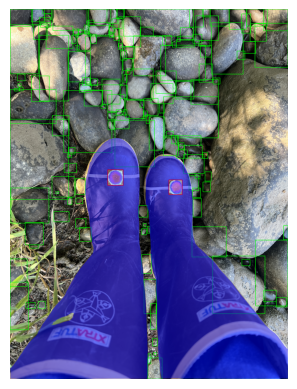

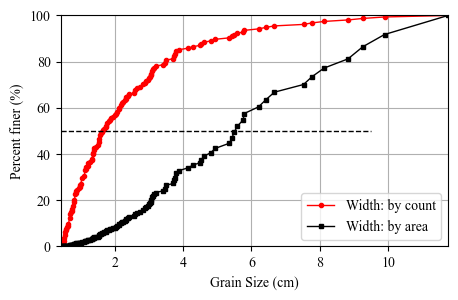

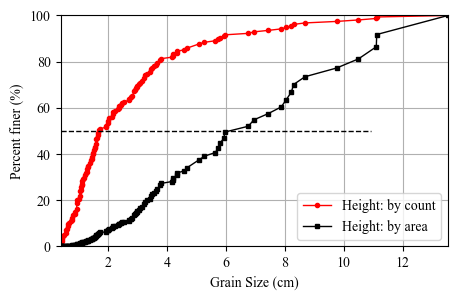

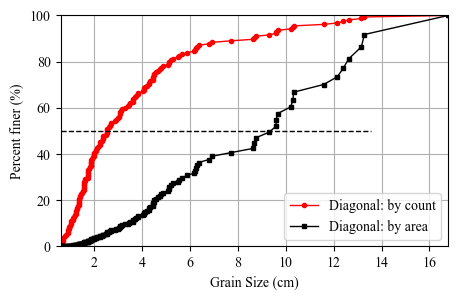

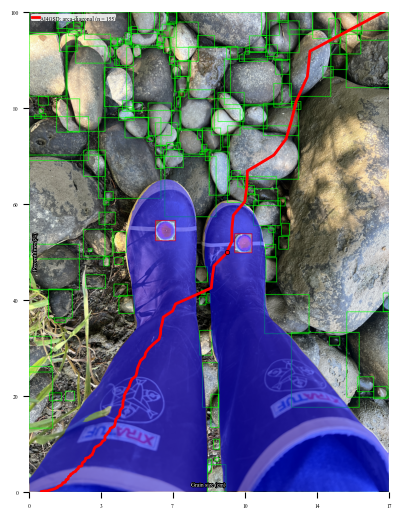

2/6: IMG_7908.JPG, resolution 0.15 mm/px (33.33%), 6.48 s
Detected 179 rocks, diagonal and count based D10, D50, D60, and D84 are: 1.16, 2.39, 2.88, and 4.94 cm
Detected 179 rocks, diagonal and area  based D10, D50, D60, and D84 are: 3.16, 9.92, 11.92, and 19.68 cm


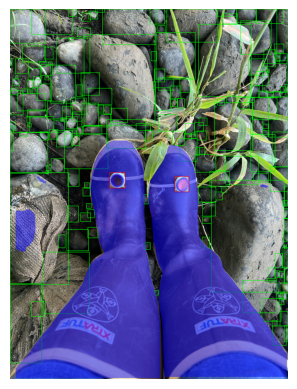

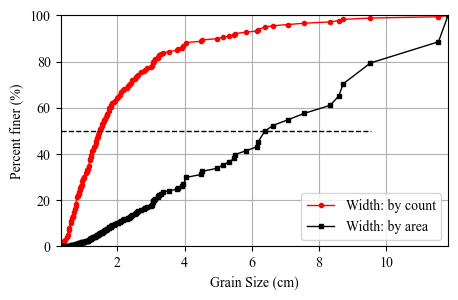

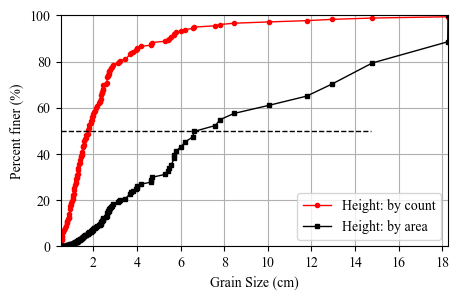

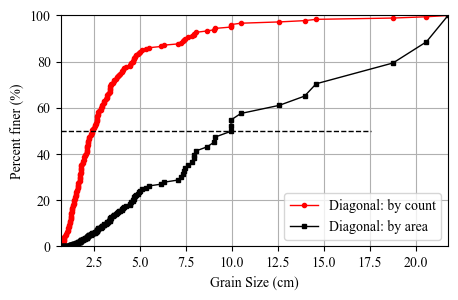

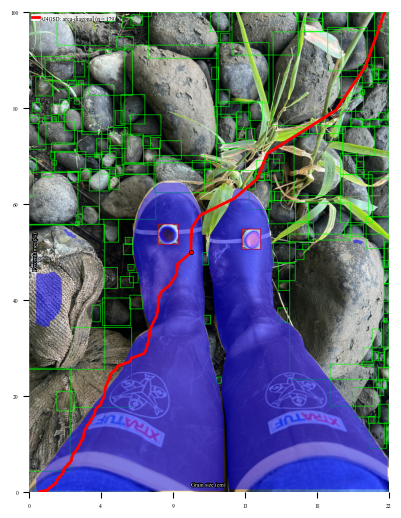

3/6: IMG_7914.JPG, resolution 0.16 mm/px (50.00%), 6.25 s
Detected 254 rocks, diagonal and count based D10, D50, D60, and D84 are: 0.85, 1.66, 2.06, and 3.76 cm
Detected 254 rocks, diagonal and area  based D10, D50, D60, and D84 are: 2.08, 6.23, 8.11, and 12.46 cm


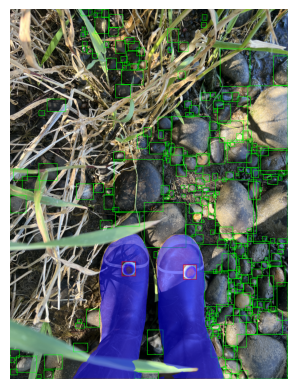

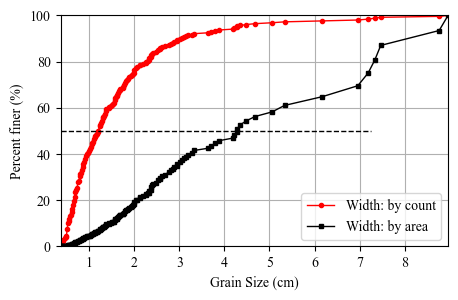

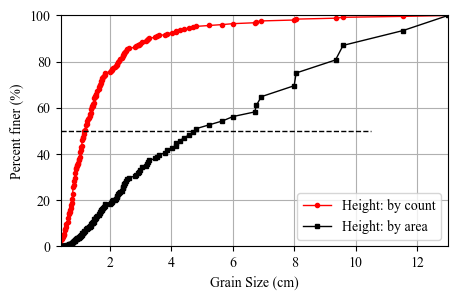

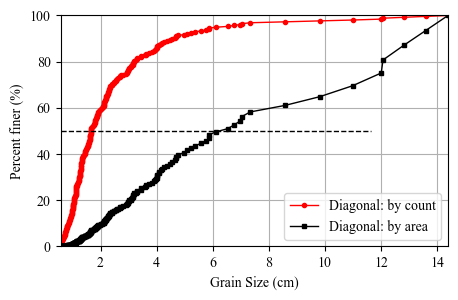

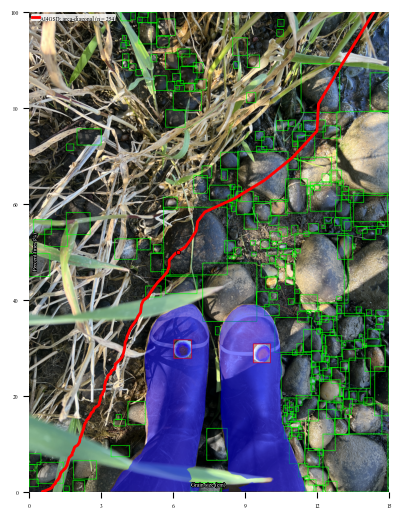

4/6: IMG_7918_150.png, resolution 1.00 px/px (66.67%), 6.26 s
5/6: IMG_7918_300.png, resolution 0.35 mm/px (83.33%), 0.49 s
Detected 189 rocks, diagonal and count based D10, D50, D60, and D84 are: 1.41, 2.39, 2.70, and 4.77 cm
Detected 189 rocks, diagonal and area  based D10, D50, D60, and D84 are: 2.28, 5.59, 6.56, and 9.87 cm


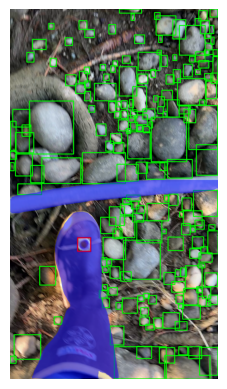

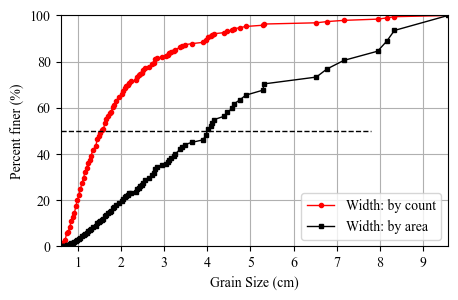

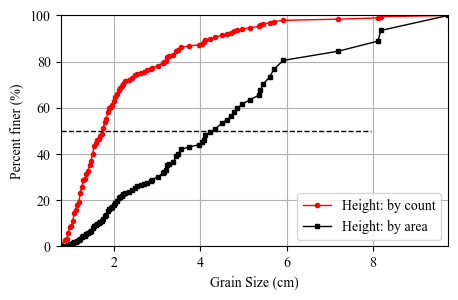

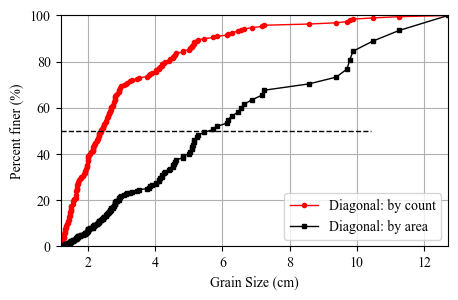

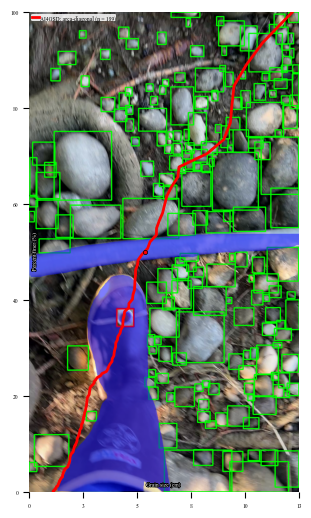

6/6: IMG_7919.JPG, resolution 0.26 mm/px (100.00%), 3.21 s
Detected 209 rocks, diagonal and count based D10, D50, D60, and D84 are: 1.27, 2.39, 2.81, and 4.89 cm
Detected 209 rocks, diagonal and area  based D10, D50, D60, and D84 are: 2.61, 8.03, 8.63, and 13.58 cm


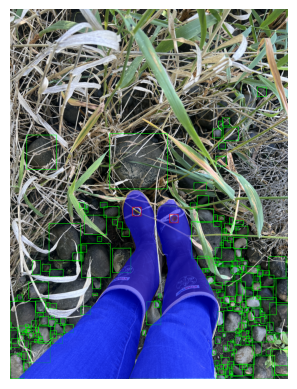

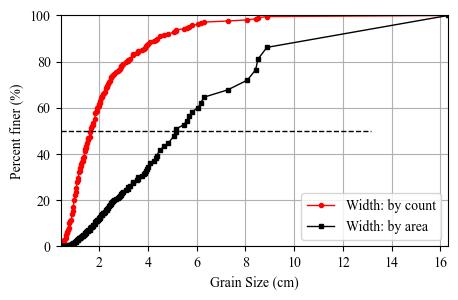

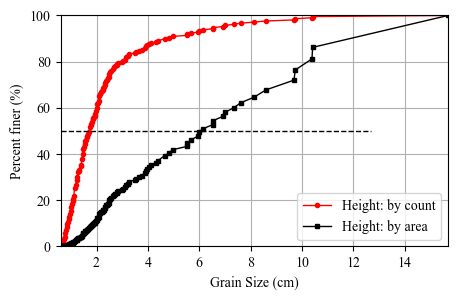

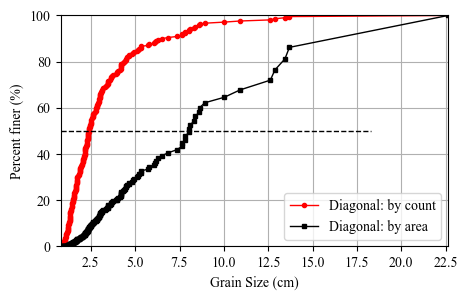

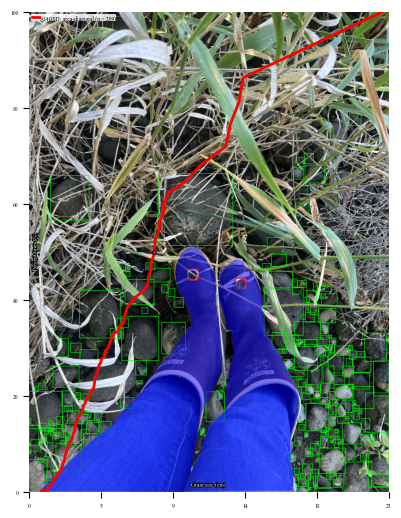

Output folder summary data to: /home/chen200/Computation/Python/work/Mine/SFA/AI4GSD/Demo_Data/20250627_LR_WalkSmartphoneFieldTest/grains_predicts/20250627_LR_WalkSmartphoneFieldTest_YOLO11m.1280.20250322_35/Statistics_V3_20250627_LR_WalkSmartphoneFieldTest_YOLO11m.1280.20250322_35.csv
Total number of grains: 986, number of grains per photo: 164.33
Total time: 28.91 s, time per photo 4.82 s

Output all summary data to: /home/chen200/Computation/Python/work/Mine/SFA/AI4GSD/Demo_Data/20250627_LR_WalkSmartphoneFieldTest/Statistics_V3_20250627_LR_WalkSmartphoneFieldTest_YOLO11m.1280.20250322_35.csv
Total execution time: 28.92 s


In [7]:
PP = AI4GSD.parameters()
PP.Directory = PhotoDir
PP.ModelName = 'YOLO11m.1280.20250322'
PP.ImageSizeFactor = 1
PP.LineThickness = 2
PP.YOLOSave = False
PP.SaveFigure = True
PP.SaveOverlay = True
PP.OverWriteAll = True                                                  
PP.PrintOnScreen = True  
PP.MaximumGrainSize = 0.2
gsd = AI4GSD.Photo2GSD(PP)

### 7. Applying quality control

In [8]:
gsdqc, stqc = AI4GSD.qualityControl(PhotoDir)


Quality control summary for 20250627_LR_WalkSmartphoneFieldTest:
1/1: IMG_7918.MOV, time 14.8 s, area 0.3 m2, valid area 0.3 m2 (100.0%), frame 2, valid frame 1 (50.0%)
1/1: ***, grain number 189, number per image 189.0; efficiency 0.0 m2/s, 12.8 grains/s
Photos: time 378.0 s, area 1.7 m2, valid area 1.4 m2 (82.9%), frame 4, valid frame 3 (75.0%)
Photos: grain number 797, number per image 199.2; efficiency 0.0 m2/s, 2.1 grains/s
All: time 392.8 s, area 2.0 m2, valid area 1.7 m2 (85.2%), frame 6, valid frame 4 (66.7%)
All: grain number 986, number per image 197.2; efficiency 0.0 m2/s, 2.5 grains/s
